# Class Maximization on VGG16

Name: Anthony Kevin Oktavius

Code Reference:

* https://github.com/anaramirli/visualizing-cnn-features

* https://github.com/fg91/visualizing-cnn-feature-maps/blob/master/filter_visualizer.ipynb

* https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [1]:
import numpy as np
import zipfile
import gc
import cv2
import math
import warnings
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import PIL
import imutils
from sklearn.metrics import confusion_matrix, roc_curve

from torch.utils.data import Dataset
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torchvision import models, transforms
from zipfile import ZipFile
from IPython import display
from google.colab.patches import cv2_imshow
from imutils.contours import sort_contours

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
pretrained_model = models.vgg19(
    pretrained = True
).to(device)

pretrained_model.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 116MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

============Class Index 0 (0)==============
Current iteration: 0, with current loss: 1.950871467590332
Current iteration: 10, with current loss: -16.091751098632812
Current iteration: 20, with current loss: -73.46714782714844
Current iteration: 0, with current loss: -5.379653453826904
Current iteration: 10, with current loss: -108.47718048095703
Current iteration: 20, with current loss: -235.18679809570312
Current iteration: 0, with current loss: -28.019495010375977
Current iteration: 10, with current loss: -203.3245849609375
Current iteration: 20, with current loss: -310.84930419921875
Current iteration: 0, with current loss: -42.913272857666016
Current iteration: 10, with current loss: -256.55230712890625
Current iteration: 20, with current loss: -407.21783447265625
Current iteration: 0, with current loss: -52.941612243652344
Current iteration: 10, with current loss: -316.2982177734375
Current iteration: 20, with current loss: -462.36029052734375
Current iteration: 0, with current lo

torch.Size([3, 268, 268])
============Class Index 294 (1)==============
Current iteration: 0, with current loss: 1.8982666730880737
Current iteration: 10, with current loss: -16.42124366760254
Current iteration: 20, with current loss: -48.19682693481445
Current iteration: 0, with current loss: -0.039781488478183746
Current iteration: 10, with current loss: -66.26419067382812
Current iteration: 20, with current loss: -141.14321899414062
Current iteration: 0, with current loss: -14.117205619812012
Current iteration: 10, with current loss: -120.01111602783203
Current iteration: 20, with current loss: -216.6561279296875
Current iteration: 0, with current loss: -26.88810157775879
Current iteration: 10, with current loss: -170.6718292236328
Current iteration: 20, with current loss: -280.43975830078125
Current iteration: 0, with current loss: -32.73530578613281
Current iteration: 10, with current loss: -221.2564697265625
Current iteration: 20, with current loss: -351.8893737792969
Current ite

torch.Size([3, 268, 268])
============Class Index 413 (2)==============
Current iteration: 0, with current loss: -0.17791840434074402
Current iteration: 10, with current loss: -5.587181568145752
Current iteration: 20, with current loss: -11.291863441467285
Current iteration: 0, with current loss: -0.33547332882881165
Current iteration: 10, with current loss: -6.534194469451904
Current iteration: 20, with current loss: -29.543193817138672
Current iteration: 0, with current loss: -2.25374174118042
Current iteration: 10, with current loss: -67.18798065185547
Current iteration: 20, with current loss: -145.75283813476562
Current iteration: 0, with current loss: -10.546287536621094
Current iteration: 10, with current loss: -128.12705993652344
Current iteration: 20, with current loss: -233.751953125
Current iteration: 0, with current loss: -23.885269165039062
Current iteration: 10, with current loss: -184.2858123779297
Current iteration: 20, with current loss: -302.548828125
Current iteration

torch.Size([3, 268, 268])


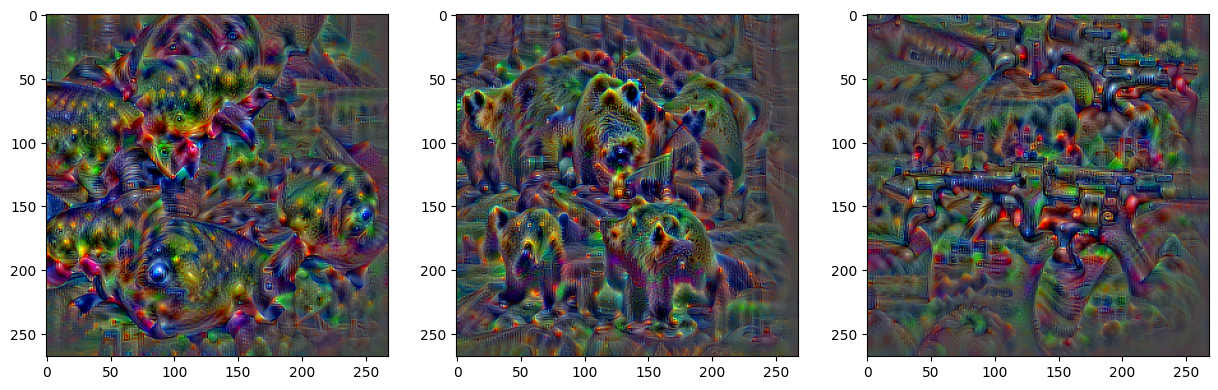

In [55]:
n_iteration = 30
CLASS_NUMBERS = [0, 294, 413]

N_ROWS = 1
N_COLS = 3
UPSCALING_STEPS = 15
UPSCALING_FACTOR = 1.2
FEATURE_SIZE = 224
BLUR_KERNEL_SIZE = 5
fig_filter_maximization, axes_filter_maximization = plt.subplots(ncols = N_COLS, nrows = N_ROWS, figsize = (15, 15))

denorm = transforms.Compose([ 
    transforms.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]),                 
    transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ]),                                                     
])

for index, class_number in enumerate(CLASS_NUMBERS):
  row_index = int(index / N_COLS)
  col_index = index % N_COLS
  print(f"============Class Index {class_number} ({index})==============")
  sample_input_data_1 = np.random.uniform(40, 100, (FEATURE_SIZE, FEATURE_SIZE, 3)) / 255 # Tensor with uniform distribution.  
  
  for _ in range(UPSCALING_STEPS):
    sample_input_data_1_tensor = torch.Tensor(sample_input_data_1).permute(2, 0, 1)
    sample_input_data_1_tensor = sample_input_data_1_tensor.unsqueeze(0)
    sample_input_data_1_tensor.requires_grad = True
    optimizer = optim.SGD([sample_input_data_1_tensor], lr=0.1)
    for iteration in range(n_iteration):
      optimizer.zero_grad()

      output_label = pretrained_model(sample_input_data_1_tensor.to(device))
      output_label = output_label[:, class_number]
      output_label_loss = -(output_label).mean()
      output_label_loss.backward() # Perform Gradient Ascent.
      optimizer.step()

      if iteration % 10 == 0:
        print(f"Current iteration: {iteration}, with current loss: {output_label_loss.item()}")

    new_image_size = int(FEATURE_SIZE * UPSCALING_FACTOR)
    sample_input_data_1_tensor = sample_input_data_1_tensor.squeeze(0)
    sample_input_data_1 = np.transpose(sample_input_data_1_tensor.cpu().detach().numpy(), (1, 2, 0))
    sample_input_data_1 = cv2.resize(sample_input_data_1, (new_image_size, new_image_size), interpolation = cv2.INTER_CUBIC)
    sample_input_data_1 = cv2.blur(sample_input_data_1,(BLUR_KERNEL_SIZE, BLUR_KERNEL_SIZE))
  
  print(sample_input_data_1_tensor.shape)
  class_maximization_viz_image = sample_input_data_1_tensor
  class_maximization_viz_image = np.transpose(class_maximization_viz_image.cpu().detach().numpy(), (1, 2, 0))
  axes_filter_maximization[col_index].imshow(class_maximization_viz_image)